<a href="https://colab.research.google.com/github/marcusnmiranda/SemanaPython/blob/main/Solicita%C3%A7%C3%A3o_de_Analise_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](attachment:image.png)

## Demanda:

### Criar um algoritimo que possa fazer previsão de análise de crédito.

Python é uma das linguagens de programação mais populares por ser completa e fácil de aprender. Uma consequência disso é uma vasta comunidade, que disponibiliza bibliotecas Python para diversas áreas da tecnologia.

A principal área é a data science (ciência de dados). A ciência de dados tem ganhado destaque, pois é uma ferramenta poderosa para as organizações, auxiliando na coleta de informações e na tomada de decisões estratégicas.

Então, vamos mostrar as principais bibliotecas Python que ajudam os cientistas de dados a executar seu trabalho. São elas:

Arrow;
Numpy;
Pandas;
Bokeh;
NLTK;
Pytil;
Poetry;
Theano;
Scikit Learn;
Tensor Flow;
Keras.
Elas são dos mais variados tipos: organização de matrizes, análise de expressões matemáticas, geração de gráficos, entre outros.

Preparado para conhecer essas bibliotecas de python? Fique tranquilo que você não precisa saber programação para seguir

Nos últimos anos a o crescimento da linguagem Python foi enorme. Grandes sites como GitHub, Stack Overflow e TIOBE mostram como a popularidade dessa linguagem aumentou, se tornando a segunda linguagem mais amada, segundo a pesquisa do Stack Overflow com milhares de desenvolvedores.

Além disso, o mercado de trabalho procura, cada vez mais, profissionais capacitados que sabem como utilizar o máximo da linguagem.

## Biblioteca

Alguém pensou que tinha que existir uma forma mais Facil de fazer determinadas atividades.

In [69]:
# Utilizar uma bibliteca que nos ajude a carregar os dados

# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

# 1º Passo é instalar a Biblioteca
!pip install pandas

# 2º utilizar o comando "Import" para informar ao programa que iremos usar
# 3º como no nome pandas tem 5 letras, é comum criar um apelido de duas letras pra reduzir digitação

import pandas as pd

In [70]:
# Precisamos cria um local vazio para armenzar os dados que estamos carregando, para isso basta o comando abaixo
Conjunto_dados =[]

In [71]:
#Lendo os dados do arquivo CVS
Conjunto_dados = pd.read_csv('/content/dados.csv')
Conjunto_dados['ID'] = Conjunto_dados.index 

In [72]:
#Visualizandos os dados
Conjunto_dados

,RENDA,IDADE,EMPRESTIMO,RESULTADO,ID
0,66155.92,59.0,8106.53,0,0
1,34415.15,48.0,6564.74,0,1
2,57317.17,63.0,8020.95,0,2
3,42709.53,45.0,6103.64,0,3
4,66952.68,18.0,8770.09,1,4
...,...,...,...,...,...
1995,59221.04,48.0,1926.72,0,1995
1996,69516.12,23.0,3503.17,0,1996
1997,44311.44,28.0,5522.78,1,1997
1998,43756.05,63.0,1622.72,0,1998


O processo de "Feature Engineering" são etapas de pré-processamento que transformam dados brutos em recursos que podem ser usados em algoritmos de aprendizado de máquina, como modelos preditivos. 

Os modelos preditivos consistem em uma variável de resultado e variáveis preditoras, e é durante o processo de engenharia de recursos que as variáveis preditoras mais úteis são criadas e selecionadas para o modelo preditivo.

Este é um processo subjetivo que requer intervenção humana e criatividade. Os recursos existentes são misturados por meio de adição, subtração, multiplicação e razão para criar novos recursos derivados com maior poder preditivo.  

In [73]:
#Visualizando as novas colunas, todas zeradas
Conjunto_dados

,RENDA,IDADE,EMPRESTIMO,RESULTADO,ID
0,66155.92,59.0,8106.53,0,0
1,34415.15,48.0,6564.74,0,1
2,57317.17,63.0,8020.95,0,2
3,42709.53,45.0,6103.64,0,3
4,66952.68,18.0,8770.09,1,4
...,...,...,...,...,...
1995,59221.04,48.0,1926.72,0,1995
1996,69516.12,23.0,3503.17,0,1996
1997,44311.44,28.0,5522.78,1,1997
1998,43756.05,63.0,1622.72,0,1998


In [74]:
import warnings
warnings.filterwarnings("ignore")

#Criando novos Campos (Feature Engineering)

#Deixando apenas os registros de idade que são maior do que zero
Conjunto_dados = Conjunto_dados[Conjunto_dados["IDADE"] > 0]

#Criando o campo Faixa de Renda, inicialmente com o Valor zero
Conjunto_dados["FaixaRenda"] = 0
#Criando o campo Faixa Etaria, inicialmente com o Valor zero
Conjunto_dados["FaixaEtaria"] = 0
#Criando o campo Faixa de Emprestimo, inicialmente com o Valor zero
Conjunto_dados["FaixaEmprestimo"] = 0

#Aqui estamos populando o campo Faixa Renda com base na classificação abaixo:

#Quem ganha menos de 2000 fica na faixa zero
Conjunto_dados.loc[(Conjunto_dados["RENDA"] < 20000), "FaixaRenda"] = 0
#Quem ganha entre 2000 e 3000 fica na faixa 1
Conjunto_dados.loc[(Conjunto_dados["RENDA"] >= 20000) & (Conjunto_dados["RENDA"] < 30000), "FaixaRenda"] = 1
#Quem ganha entre 3000 e 4000 fica na faixa 2
Conjunto_dados.loc[(Conjunto_dados["RENDA"] >= 30000) & (Conjunto_dados["RENDA"] < 40000), "FaixaRenda"] = 2
#Quem ganha entre 4000 e 5000 fica na faixa 3
Conjunto_dados.loc[(Conjunto_dados["RENDA"] >= 40000) & (Conjunto_dados["RENDA"] < 50000), "FaixaRenda"] = 3
#Quem ganha entre 5000 e 6000 fica na faixa 4
Conjunto_dados.loc[(Conjunto_dados["RENDA"] >= 50000) & (Conjunto_dados["RENDA"] < 60000), "FaixaRenda"] = 4
#Quem ganha entre 6000 e 7000 fica na faixa 5
Conjunto_dados.loc[(Conjunto_dados["RENDA"] >= 60000) & (Conjunto_dados["RENDA"] < 70000), "FaixaRenda"] = 5
#Quem ganha mais de 7000 fica na faixa 6
Conjunto_dados.loc[(Conjunto_dados["RENDA"] >= 70000), "FaixaRenda"] = 6

#Aqui estamos populando o campo Faixa Etaria com base na classificação abaixo:

#Quem tem a idade menor que 18 e menor que 25 fica na faixa 0
Conjunto_dados.loc[(Conjunto_dados["IDADE"]) >= 18 & (Conjunto_dados["IDADE"] < 25), "FaixaEtaria"] = 0
#Quem tem a idade menor que 25 e menor que 60 fica na faixa 1
Conjunto_dados.loc[(Conjunto_dados["IDADE"]) >= 25 & (Conjunto_dados["IDADE"] < 60), "FaixaEtaria"] = 1
#Quem tem a idade maior que 60 fica na faixa 2
Conjunto_dados.loc[(Conjunto_dados["IDADE"] >= 60), "FaixaEtaria"] = 2

#Aqui estamos populando o campo Faixa Emprestimo com base na classificação abaixo:

#Quem pediu o emprestimo com o valor menor que 2000 fica na faixa 0
Conjunto_dados.loc[(Conjunto_dados["EMPRESTIMO"] < 2000), "FaixaEmprestimo"] = 0
#Quem pediu o emprestimo com o valor entre 2000 e 4000 fica na faixa 1
Conjunto_dados.loc[(Conjunto_dados["EMPRESTIMO"] >= 2000) & (Conjunto_dados["EMPRESTIMO"] < 4000), "FaixaEmprestimo"] = 1
#Quem pediu o emprestimo com o valor entre 4000 e 6000  fica na faixa 2
Conjunto_dados.loc[(Conjunto_dados["EMPRESTIMO"] >= 4000) & (Conjunto_dados["EMPRESTIMO"] < 6000), "FaixaEmprestimo"] = 2
#Quem pediu o emprestimo com o valor entre 6000 e 8000 fica na faixa 3
Conjunto_dados.loc[(Conjunto_dados["EMPRESTIMO"] >= 6000) & (Conjunto_dados["EMPRESTIMO"] < 8000), "FaixaEmprestimo"] = 3
#Quem pediu o emprestimo com o valor entre 8000 e 10000 fica na faixa 4
Conjunto_dados.loc[(Conjunto_dados["EMPRESTIMO"] >= 8000) & (Conjunto_dados["EMPRESTIMO"] < 10000), "FaixaEmprestimo"] = 4
#Quem pediu o emprestimo com o valor entre 12000 e 14000 fica na faixa 5
Conjunto_dados.loc[(Conjunto_dados["EMPRESTIMO"] >= 12000) & (Conjunto_dados["EMPRESTIMO"] < 14000), "FaixaEmprestimo"] = 5
#Quem pediu o emprestimo com o valor entre 14000 e 16000 fica na faixa 6
Conjunto_dados.loc[(Conjunto_dados["EMPRESTIMO"] >= 14000) & (Conjunto_dados["EMPRESTIMO"] < 16000), "FaixaEmprestimo"] = 6
#Quem pediu o emprestimo com o valor maior que 16 fica na faixa 7
Conjunto_dados.loc[(Conjunto_dados["EMPRESTIMO"] >= 16000), "FaixaEmprestimo"] = 7

In [75]:
#Vamos embaralhar os dados
Solicitacoes_não_aprovadas = []
Solicitacoes_aprovadas = []

Solicitacoes_não_aprovadas = Conjunto_dados[Conjunto_dados["RESULTADO"] == 0]
Solicitacoes_aprovadas = Conjunto_dados[Conjunto_dados["RESULTADO"] == 1]

Solicitacoes_aprovadas = Solicitacoes_aprovadas.sample(frac=1, random_state=905).reset_index(drop=True)
Solicitacoes_não_aprovadas = Solicitacoes_não_aprovadas.sample(frac=1, random_state=27).reset_index(drop=True)

In [76]:
#DEIXA SOMENTE 1000 REGISTROS COM RESULTADOS IGUAL A 0 PARA NÃO DEIXAR A BASE DESBALANCEADA
qtd_nao_aprovadas = len(Solicitacoes_não_aprovadas)
qtd_aprovadas = len(Solicitacoes_aprovadas)
print(qtd_nao_aprovadas, qtd_aprovadas)

1711 283


In [77]:
# balanceando 
Solicitacoes_não_aprovadas = Solicitacoes_não_aprovadas[Solicitacoes_não_aprovadas.index < qtd_aprovadas]
Solicitacoes_não_aprovadas

,RENDA,IDADE,EMPRESTIMO,RESULTADO,ID,FaixaRenda,FaixaEtaria,FaixaEmprestimo
0,24791.18,39.0,4844.68,0,1900,1,1,2
1,65569.78,62.0,12494.26,0,1124,5,2,5
2,50208.53,35.0,729.60,0,1285,4,1,0
3,25008.94,63.0,2941.02,0,1257,1,2,1
4,44037.24,58.0,5269.51,0,1661,3,1,2
...,...,...,...,...,...,...,...,...
278,44964.01,48.0,693.21,0,1352,3,1,0
279,22765.19,20.0,540.61,0,528,1,1,0
280,40716.19,25.0,2389.70,0,1571,3,1,1
281,55441.35,48.0,10768.74,0,589,4,1,0


In [78]:
# UNE OS DADOS NOVAMENTE
DadosTratados = pd.concat([Solicitacoes_aprovadas, Solicitacoes_não_aprovadas])
DadosTratados

# SHUFFLE NO DF
DadosTratados = DadosTratados.sample(frac=1, random_state=1).reset_index(drop=True)
DadosTratados

,RENDA,IDADE,EMPRESTIMO,RESULTADO,ID,FaixaRenda,FaixaEtaria,FaixaEmprestimo
0,61050.34,26.0,5893.26,0,12,5,1,2
1,57827.66,23.0,10816.75,1,649,4,1,0
2,55097.38,33.0,9342.47,1,679,4,1,4
3,37887.54,24.0,5061.77,1,1114,2,1,2
4,31527.34,59.0,2062.71,0,852,2,1,1
...,...,...,...,...,...,...,...,...
561,41736.20,34.0,7602.61,1,676,3,1,3
562,54022.91,26.0,10641.45,1,735,4,1,0
563,33751.20,25.0,6494.18,1,549,2,1,3
564,64983.15,27.0,9109.77,1,947,5,1,4


### Preparando os Dados

In [79]:
DadosTratados.head(5)

,RENDA,IDADE,EMPRESTIMO,RESULTADO,ID,FaixaRenda,FaixaEtaria,FaixaEmprestimo
0,61050.34,26.0,5893.26,0,12,5,1,2
1,57827.66,23.0,10816.75,1,649,4,1,0
2,55097.38,33.0,9342.47,1,679,4,1,4
3,37887.54,24.0,5061.77,1,1114,2,1,2
4,31527.34,59.0,2062.71,0,852,2,1,1


In [80]:
y = DadosTratados['RESULTADO']
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: RESULTADO, dtype: int64

In [81]:
X = DadosTratados.drop(['RESULTADO','ID' ], axis=1)
X.head(5)

,RENDA,IDADE,EMPRESTIMO,FaixaRenda,FaixaEtaria,FaixaEmprestimo
0,61050.34,26.0,5893.26,5,1,2
1,57827.66,23.0,10816.75,4,1,0
2,55097.38,33.0,9342.47,4,1,4
3,37887.54,24.0,5061.77,2,1,2
4,31527.34,59.0,2062.71,2,1,1


In [82]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Validação e Treinamento do Modelo

In [83]:
#Aqui estamos separando o conjunto de dados em Treino e Teste, onde para o teste separamos 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
#Visualizando os dados de Treino sem a coluna RESULTADO
X_train

,RENDA,IDADE,EMPRESTIMO,FaixaRenda,FaixaEtaria,FaixaEmprestimo
405,47187.57,24.0,7933.46,3,1,3
11,34237.57,34.0,2658.09,2,1,1
471,29761.04,21.0,3748.25,1,1,1
441,27514.42,21.0,3400.91,1,1,1
96,24791.18,39.0,4844.68,1,1,2
...,...,...,...,...,...,...
308,34399.20,31.0,6019.83,2,1,3
159,44896.25,48.0,3787.63,3,1,1
345,61952.90,18.0,3635.60,5,1,1
10,29572.97,39.0,5006.25,1,1,2


In [85]:
#Visualizando os dados de Treino Somente a coluna RESULTADO
y_train

405    1
11     0
471    1
441    1
96     0
      ..
308    1
159    0
345    0
10     0
216    0
Name: RESULTADO, Length: 452, dtype: int64

In [86]:
#Visualizando os dados de Teste sem a coluna RESULTADO
X_test

,RENDA,IDADE,EMPRESTIMO,FaixaRenda,FaixaEtaria,FaixaEmprestimo
246,66952.68,18.0,8770.09,5,1,4
229,48436.66,49.0,5851.40,3,1,2
185,24294.67,22.0,4360.05,1,1,2
491,53226.19,43.0,5686.64,4,1,2
300,48689.00,36.0,3859.47,3,1,1
...,...,...,...,...,...,...
317,26316.75,37.0,923.02,1,1,0
21,50258.55,22.0,1086.24,4,1,0
515,48630.97,27.0,5862.83,3,1,2
120,47704.38,21.0,2717.07,3,1,1


In [87]:
#Visualizando os dados de Teste Somente a coluna RESULTADO
y_test

246    1
229    0
185    1
491    0
300    0
      ..
317    0
21     0
515    1
120    0
281    1
Name: RESULTADO, Length: 114, dtype: int64

### KNN

K Nearest Neighbor (KNN) é muito simples, fácil de entender, versátil e um dos algoritmos de aprendizado de máquina mais importantes. KNN usado em uma variedade de aplicações como finanças, saúde, ciência política, detecção de manuscrito, reconhecimento de imagem e reconhecimento de vídeo. Nas classificações de crédito, os institutos financeiros irão prever a classificação de crédito dos clientes. No desembolso de empréstimos, os institutos bancários irão prever se o empréstimo é seguro ou arriscado. Na ciência política, classificar potenciais eleitores em duas classes votará ou não votará. Algoritmo KNN usado para problemas de classificação e regressão. Algoritmo KNN baseado na abordagem de similaridade de recursos

A estrutura do modelo determinada a partir do conjunto de dados. Isso será muito útil na prática, onde a maioria dos conjuntos de dados do mundo real não segue suposições teóricas matemáticas. O algoritmo preguiçoso significa que não precisa de nenhum ponto de dados de treinamento para a geração do modelo. Todos os dados de treinamento usados na fase de teste. Isso torna o treinamento mais rápido e a fase de teste mais lenta e cara. Fase de teste dispendiosa significa tempo e memória. Na pior das hipóteses, o KNN precisa de mais tempo para varrer todos os pontos de dados e varrer todos os pontos de dados exigirá mais memória para armazenar dados de treinamento.

### Configurando o Algoritimo

In [88]:
KNN_model = KNeighborsClassifier(n_neighbors=100)

![image-4.png](attachment:image-4.png)

### Treinando o Modelo

In [89]:
KNN_model = KNN_model.fit(X_train, y_train)

### Visualizando a Acuracia

              precision    recall  f1-score   support

           0       0.54      0.70      0.61        54
           1       0.64      0.47      0.54        60

    accuracy                           0.58       114
   macro avg       0.59      0.59      0.58       114
weighted avg       0.59      0.58      0.57       114



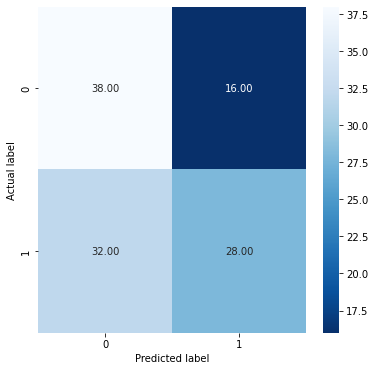

In [90]:
y_pred_KNN_model = KNN_model.predict(X_test)
matrixConfusao = metrics.confusion_matrix(y_test, y_pred_KNN_model)
plt.figure(figsize=(6,6))
sns.heatmap(matrixConfusao, annot=True, fmt=".2f", cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
print(classification_report(y_test, y_pred_KNN_model))

In [91]:
#Fazendo todo o tratamento para um novo exemplo
novocliente1 = pd.read_csv('/content/NovoCliente1.csv')
novocliente1["FaixaRenda"] = 0
novocliente1["FaixaEtaria"] = 0
novocliente1["FaixaEmprestimo"] = 0
novocliente1.loc[(novocliente1["RENDA"] < 20000), "FaixaRenda"] = 0
novocliente1.loc[(novocliente1["RENDA"] >= 20000) & (novocliente1["RENDA"] < 30000), "FaixaRenda"] = 1
novocliente1.loc[(novocliente1["RENDA"] >= 30000) & (novocliente1["RENDA"] < 40000), "FaixaRenda"] = 2
novocliente1.loc[(novocliente1["RENDA"] >= 40000) & (novocliente1["RENDA"] < 50000), "FaixaRenda"] = 3
novocliente1.loc[(novocliente1["RENDA"] >= 50000) & (novocliente1["RENDA"] < 60000), "FaixaRenda"] = 4
novocliente1.loc[(novocliente1["RENDA"] >= 60000) & (novocliente1["RENDA"] < 70000), "FaixaRenda"] = 5
novocliente1.loc[(novocliente1["RENDA"] >= 70000), "FaixaRenda"] = 6
novocliente1 = novocliente1[novocliente1["IDADE"] > 0]
novocliente1[novocliente1["IDADE"] < 0 ]
novocliente1.loc[(novocliente1["IDADE"]) >= 18 & (novocliente1["IDADE"] < 25), "FaixaEtaria"] = 0
novocliente1.loc[(novocliente1["IDADE"]) >= 25 & (novocliente1["IDADE"] < 60), "FaixaEtaria"] = 1
novocliente1.loc[(novocliente1["IDADE"] >= 60), "FaixaEtaria"] = 2
novocliente1.loc[(novocliente1["EMPRESTIMO"] < 2000), "FaixaEmprestimo"] = 0
novocliente1.loc[(novocliente1["EMPRESTIMO"] >= 2000) & (novocliente1["EMPRESTIMO"] < 4000), "FaixaEmprestimo"] = 1
novocliente1.loc[(novocliente1["EMPRESTIMO"] >= 4000) & (novocliente1["EMPRESTIMO"] < 6000), "FaixaEmprestimo"] = 2
novocliente1.loc[(novocliente1["EMPRESTIMO"] >= 6000) & (novocliente1["EMPRESTIMO"] < 8000), "FaixaEmprestimo"] = 3
novocliente1.loc[(novocliente1["EMPRESTIMO"] >= 8000) & (novocliente1["EMPRESTIMO"] < 10000), "FaixaEmprestimo"] = 4
novocliente1.loc[(novocliente1["EMPRESTIMO"] >= 12000) & (novocliente1["EMPRESTIMO"] < 14000), "FaixaEmprestimo"] = 5
novocliente1.loc[(novocliente1["EMPRESTIMO"] >= 14000) & (novocliente1["EMPRESTIMO"] < 16000), "FaixaEmprestimo"] = 6
novocliente1.loc[(novocliente1["EMPRESTIMO"] >= 16000), "FaixaEmprestimo"] = 7
KNN_predict1 = KNN_model.predict(novocliente1)
novocliente1

,RENDA,IDADE,EMPRESTIMO,FaixaRenda,FaixaEtaria,FaixaEmprestimo
0,66155.92,59.0,8106.53,5,1,4


In [92]:
if KNN_predict1[0] == 1:
    prediction = 'Crédito Aprovado'
else:
    prediction = 'Crédito Não aprovado'
prediction

'Crédito Aprovado'

In [93]:
#Fazendo todo o tratamento para um novo exemplo
novocliente2 = pd.read_csv('/content/NovoCliente2.csv')
novocliente2["FaixaRenda"] = 0
novocliente2["FaixaEtaria"] = 0
novocliente2["FaixaEmprestimo"] = 0
novocliente2.loc[(novocliente2["RENDA"] < 20000), "FaixaRenda"] = 0
novocliente2.loc[(novocliente2["RENDA"] >= 20000) & (novocliente2["RENDA"] < 30000), "FaixaRenda"] = 1
novocliente2.loc[(novocliente2["RENDA"] >= 30000) & (novocliente2["RENDA"] < 40000), "FaixaRenda"] = 2
novocliente2.loc[(novocliente2["RENDA"] >= 40000) & (novocliente2["RENDA"] < 50000), "FaixaRenda"] = 3
novocliente2.loc[(novocliente2["RENDA"] >= 50000) & (novocliente2["RENDA"] < 60000), "FaixaRenda"] = 4
novocliente2.loc[(novocliente2["RENDA"] >= 60000) & (novocliente2["RENDA"] < 70000), "FaixaRenda"] = 5
novocliente2.loc[(novocliente2["RENDA"] >= 70000), "FaixaRenda"] = 6
novocliente2 = novocliente2[novocliente2["IDADE"] > 0]
novocliente2[novocliente2["IDADE"] < 0 ]
novocliente2.loc[(novocliente2["IDADE"]) >= 18 & (novocliente2["IDADE"] < 25), "FaixaEtaria"] = 0
novocliente2.loc[(novocliente2["IDADE"]) >= 25 & (novocliente2["IDADE"] < 60), "FaixaEtaria"] = 1
novocliente2.loc[(novocliente2["IDADE"] >= 60), "FaixaEtaria"] = 2
novocliente2.loc[(novocliente2["EMPRESTIMO"] < 2000), "FaixaEmprestimo"] = 0
novocliente2.loc[(novocliente2["EMPRESTIMO"] >= 2000) & (novocliente2["EMPRESTIMO"] < 4000), "FaixaEmprestimo"] = 1
novocliente2.loc[(novocliente2["EMPRESTIMO"] >= 4000) & (novocliente2["EMPRESTIMO"] < 6000), "FaixaEmprestimo"] = 2
novocliente2.loc[(novocliente2["EMPRESTIMO"] >= 6000) & (novocliente2["EMPRESTIMO"] < 8000), "FaixaEmprestimo"] = 3
novocliente2.loc[(novocliente2["EMPRESTIMO"] >= 8000) & (novocliente2["EMPRESTIMO"] < 10000), "FaixaEmprestimo"] = 4
novocliente2.loc[(novocliente2["EMPRESTIMO"] >= 12000) & (novocliente2["EMPRESTIMO"] < 14000), "FaixaEmprestimo"] = 5
novocliente2.loc[(novocliente2["EMPRESTIMO"] >= 14000) & (novocliente2["EMPRESTIMO"] < 16000), "FaixaEmprestimo"] = 6
novocliente2.loc[(novocliente2["EMPRESTIMO"] >= 16000), "FaixaEmprestimo"] = 7
KNN_predict2 = KNN_model.predict(novocliente2)
novocliente2

,RENDA,IDADE,EMPRESTIMO,FaixaRenda,FaixaEtaria,FaixaEmprestimo
0,155.92,17.0,8106.53,0,1,4


In [94]:
if KNN_predict2[0] == 1:
    prediction = 'Crédito Aprovado'
else:
    prediction = 'Crédito Não aprovado'
prediction

'Crédito Não aprovado'

In [95]:
#Fazendo todo o tratamento para um novo exemplo
novocliente3 = pd.read_csv('/content/NovoCliente3.csv')
novocliente3["FaixaRenda"] = 0
novocliente3["FaixaEtaria"] = 0
novocliente3["FaixaEmprestimo"] = 0
novocliente3.loc[(novocliente3["RENDA"] < 20000), "FaixaRenda"] = 0
novocliente3.loc[(novocliente3["RENDA"] >= 20000) & (novocliente3["RENDA"] < 30000), "FaixaRenda"] = 1
novocliente3.loc[(novocliente3["RENDA"] >= 30000) & (novocliente3["RENDA"] < 40000), "FaixaRenda"] = 2
novocliente3.loc[(novocliente3["RENDA"] >= 40000) & (novocliente3["RENDA"] < 50000), "FaixaRenda"] = 3
novocliente3.loc[(novocliente3["RENDA"] >= 50000) & (novocliente3["RENDA"] < 60000), "FaixaRenda"] = 4
novocliente3.loc[(novocliente3["RENDA"] >= 60000) & (novocliente3["RENDA"] < 70000), "FaixaRenda"] = 5
novocliente3.loc[(novocliente3["RENDA"] >= 70000), "FaixaRenda"] = 6
novocliente3 = novocliente3[novocliente3["IDADE"] > 0]
novocliente3[novocliente3["IDADE"] < 0 ]
novocliente3.loc[(novocliente3["IDADE"]) >= 18 & (novocliente3["IDADE"] < 25), "FaixaEtaria"] = 0
novocliente3.loc[(novocliente3["IDADE"]) >= 25 & (novocliente3["IDADE"] < 60), "FaixaEtaria"] = 1
novocliente3.loc[(novocliente3["IDADE"] >= 60), "FaixaEtaria"] = 2
novocliente3.loc[(novocliente3["EMPRESTIMO"] < 2000), "FaixaEmprestimo"] = 0
novocliente3.loc[(novocliente3["EMPRESTIMO"] >= 2000) & (novocliente3["EMPRESTIMO"] < 4000), "FaixaEmprestimo"] = 1
novocliente3.loc[(novocliente3["EMPRESTIMO"] >= 4000) & (novocliente3["EMPRESTIMO"] < 6000), "FaixaEmprestimo"] = 2
novocliente3.loc[(novocliente3["EMPRESTIMO"] >= 6000) & (novocliente3["EMPRESTIMO"] < 8000), "FaixaEmprestimo"] = 3
novocliente3.loc[(novocliente3["EMPRESTIMO"] >= 8000) & (novocliente3["EMPRESTIMO"] < 10000), "FaixaEmprestimo"] = 4
novocliente3.loc[(novocliente3["EMPRESTIMO"] >= 12000) & (novocliente3["EMPRESTIMO"] < 14000), "FaixaEmprestimo"] = 5
novocliente3.loc[(novocliente3["EMPRESTIMO"] >= 14000) & (novocliente3["EMPRESTIMO"] < 16000), "FaixaEmprestimo"] = 6
novocliente3.loc[(novocliente3["EMPRESTIMO"] >= 16000), "FaixaEmprestimo"] = 7
KNN_predict3 = KNN_model.predict(novocliente3)
novocliente3

,RENDA,IDADE,EMPRESTIMO,FaixaRenda,FaixaEtaria,FaixaEmprestimo
0,1,1,1,0,1,0


In [96]:
if KNN_predict3[0] == 1:
    prediction = 'Crédito Aprovado'
else:
    prediction = 'Crédito Não aprovado'
prediction

'Crédito Não aprovado'